In [16]:
op_set = []
closed_set = []

In [17]:
class Node():
    def __init__(self):
        self.f = 0
        self.g = 0
        self.h = 0

In [14]:
import numpy as np

grid = np.zeros((5,5))


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

<hr>

In [34]:
import numpy as np

grid = np.array([

    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],

    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],

    [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],

    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [35]:
start = (0,0)
end = (19,19)

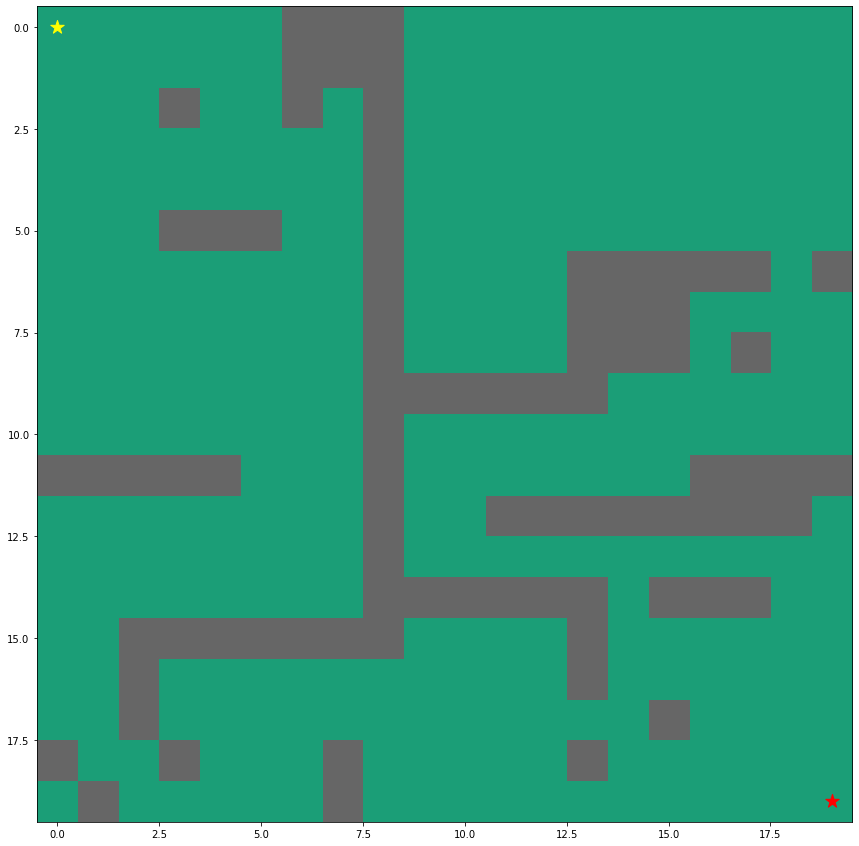

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[0], start[1], marker="*", color='yellow', s=200)
ax.scatter(end[0], end[1], marker="*", color="red", s=200)

plt.show()

In [37]:
def heuristic(a,b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

In [38]:
import heapq

def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0)]

    close_set = set()

    came_from = {}

    gscore = {start:0}

    fscore = {start:heuristic(start, goal)}

    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
 

    while oheap:

        current = heapq.heappop(oheap)[1]

        if current == goal:

            data = []

            while current in came_from:

                data.append(current)

                current = came_from[current]

            return data

        close_set.add(current)

        for i, j in neighbors:

            neighbor = current[0] + i, current[1] + j            

            tentative_g_score = gscore[current] + heuristic(current, neighbor)

            if 0 <= neighbor[0] < array.shape[0]:

                if 0 <= neighbor[1] < array.shape[1]:                

                    if array[neighbor[0]][neighbor[1]] == 1:

                        continue

                else:

                    # array bound y walls

                    continue

            else:

                # array bound x walls

                continue
 

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):

                continue
 

            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:

                came_from[neighbor] = current

                gscore[neighbor] = tentative_g_score

                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)

                heapq.heappush(oheap, (fscore[neighbor], neighbor)) 

  

In [40]:
route = astar(grid, start, end)
route = route[::-1]

In [41]:
x_coords = []
y_coords = []

for i in range(0, len(route)):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)

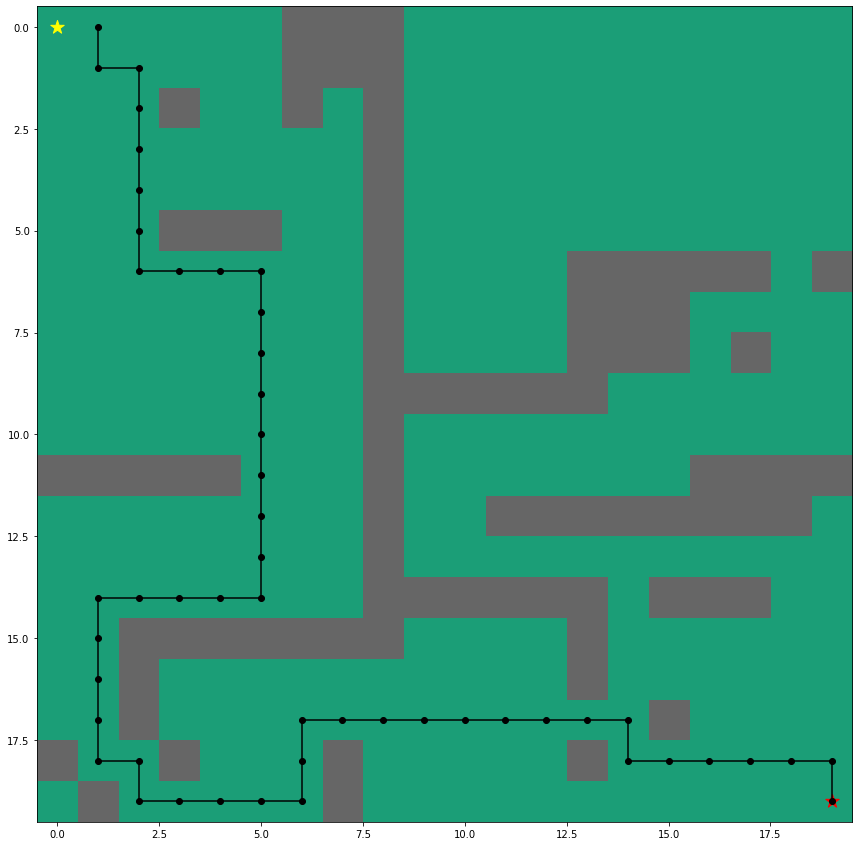

In [43]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[0], start[1], marker="*", color='yellow', s=200)
ax.scatter(end[0], end[1], marker="*", color="red", s=200)

ax.scatter(y_coords, x_coords, color='black')
ax.plot(y_coords, x_coords, color='black')

plt.show()